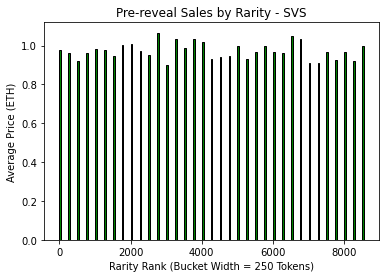

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

COLLECTION_NAME = "SVS"
BUCKET_WIDTH = 250
TOKENS = 8888

sales = pd.read_csv("../data/pre-reveal_sales.csv")

rarity_dict = {}
bins = int(TOKENS / BUCKET_WIDTH)
total_sales = 0

for i in range(0, bins): 
    upper = (i + 1) * BUCKET_WIDTH
    lower = i * BUCKET_WIDTH
    hist_bin = sales[ (sales["RANK"] > lower) & (sales["RANK"] < upper)]
    rarity_dict[lower] = hist_bin["PRICE"].sum() / len(hist_bin)
    
plt.bar(rarity_dict.keys(), rarity_dict.values(), width = 50, color='g', align = "edge", edgecolor ='black')
plt.title("Pre-reveal Sales by Rarity - {}".format(COLLECTION_NAME))
plt.xlabel("Rarity Rank (Bucket Width = {} Tokens)".format(BUCKET_WIDTH), fontsize = 10)
plt.ylabel("Average Price (ETH)", fontsize = 10)

plt.savefig('../figures/{}_average_price_vs_rank.png'.format(COLLECTION_NAME), dpi = 300)
plt.show()
